# ✍️🤖 Применение модели градиентного бустинга CatBoost для решения задачи многоклассовой классификации

In [ ]:
!pip install catboost -qU

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Предположим, что у вас есть DataFrame df с признаками и целевой переменной
X = df.drop(columns=['prediction'])
y = df['prediction']

# Преобразование целевой переменной в категориальный тип
y = y.astype('category')

# Укажите категориальные столбцы
categorical_features = ['time_of_day', 'weather', 'events', 'date']  # Замените на ваши категориальные столбцы

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели CatBoost
model = CatBoostClassifier(iterations=1000,          # Количество итераций
                           learning_rate=0.1,       # Скорость обучения
                           depth=6,                 # Глубина деревьев
                           loss_function='MultiClass',  # Функция потерь для многоклассовой классификации
                           random_seed=42,          # Случайное начальное состояние
                           verbose=100,             # Вывод информации каждые 100 итераций
                           task_type='CPU')         # Укажите тип задач (CPU или GPU)

# Обучение модели
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50,
          cat_features=categorical_features)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Сохранение модели (раскомментируйте, если нужно)
# model.save_model('catboost_model.cbm')

0:	learn: 1.1710396	test: 1.1701838	best: 1.1701838 (0)	total: 6.16s	remaining: 1h 42m 34s
100:	learn: 0.0392941	test: 0.0360245	best: 0.0360245 (100)	total: 6m 23s	remaining: 56m 56s
200:	learn: 0.0214053	test: 0.0184564	best: 0.0184564 (200)	total: 11m 42s	remaining: 46m 33s
300:	learn: 0.0175810	test: 0.0147902	best: 0.0147902 (300)	total: 16m 34s	remaining: 38m 28s
400:	learn: 0.0144490	test: 0.0118974	best: 0.0118974 (399)	total: 21m 32s	remaining: 32m 10s
500:	learn: 0.0128744	test: 0.0104266	best: 0.0104266 (500)	total: 26m 20s	remaining: 26m 14s
600:	learn: 0.0115602	test: 0.0091789	best: 0.0091789 (600)	total: 31m 13s	remaining: 20m 43s
700:	learn: 0.0104474	test: 0.0081927	best: 0.0081927 (700)	total: 35m 58s	remaining: 15m 20s
800:	learn: 0.0094417	test: 0.0073179	best: 0.0073179 (800)	total: 41m 7s	remaining: 10m 12s
900:	learn: 0.0087872	test: 0.0067812	best: 0.0067812 (900)	total: 46m 4s	remaining: 5m 3s
999:	learn: 0.0083422	test: 0.0063968	best: 0.0063968 (999)	total: 5

# Подбор оптимальных гиперпараметров для получения полее точного ответа ✅

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Предположим, что у вас есть DataFrame df с признаками и целевой переменной
X = df.drop(columns=['prediction'])
y = df['prediction']

# Преобразование целевой переменной в категориальный тип
y = y.astype('category')

# Укажите категориальные столбцы
categorical_features = ['time_of_day', 'weather', 'events', 'date']  # Замените на ваши категориальные столбцы

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
model = CatBoostClassifier(loss_function='MultiClass', random_seed=42, verbose=0)  # Изменено на Logloss

# Определение пространства гиперпараметров для поиска
param_distributions = {
    'iterations': [300, 500, 1000],  # Различное количество итераций
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],  # Увеличено количество уровней
    'l2_leaf_reg': [3, 5, 10],  # Увеличено количество регуляризации
}

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                    param_distributions=param_distributions,
                                    n_iter=20,  # Количество итераций поиска
                                    cv=3,  # Кросс-валидация
                                    random_state=42,
                                    n_jobs=-1)  # Используйте все доступные ядра

# Обучение RandomizedSearchCV
random_search.fit(X_train, y_train, cat_features=categorical_features)

# Получение лучших гиперпараметров
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Обучение модели на найденных лучших гиперпараметрах с использованием early stopping
best_model = CatBoostClassifier(**best_params, random_seed=42, verbose=100)  # Изменено на Logloss

# Обучение лучшей модели
best_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, cat_features=categorical_features)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred))

In [ ]:
# Сохранение обученной модели
model.save_model('catboost_model.cbm')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             48 non-null     object
 1   cars_per_minute  48 non-null     int64 
 2   avg_speed        48 non-null     int64 
 3   time_of_day      48 non-null     object
 4   weather          48 non-null     object
 5   events           48 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


In [ ]:
test_df['cars_per_minute']

,cars_per_minute
0,49
1,52
2,69
3,72
4,72
5,14
6,88
7,26
8,41
9,92


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Загружаем модель
model = CatBoostClassifier()
model.load_model('/content/catboost_model.cbm')

test_df = pd.read_csv('/content/test_for_pred.csv')

# Предполагаем, что test_df уже загружен и подготовлен

# Выполняем предсказания
predictions = model.predict(test_df)

<ipython-input-69-8488946a0ad4>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions_df['color'].fillna('grey', inplace=True)


CSV файл с предсказаниями успешно создан!


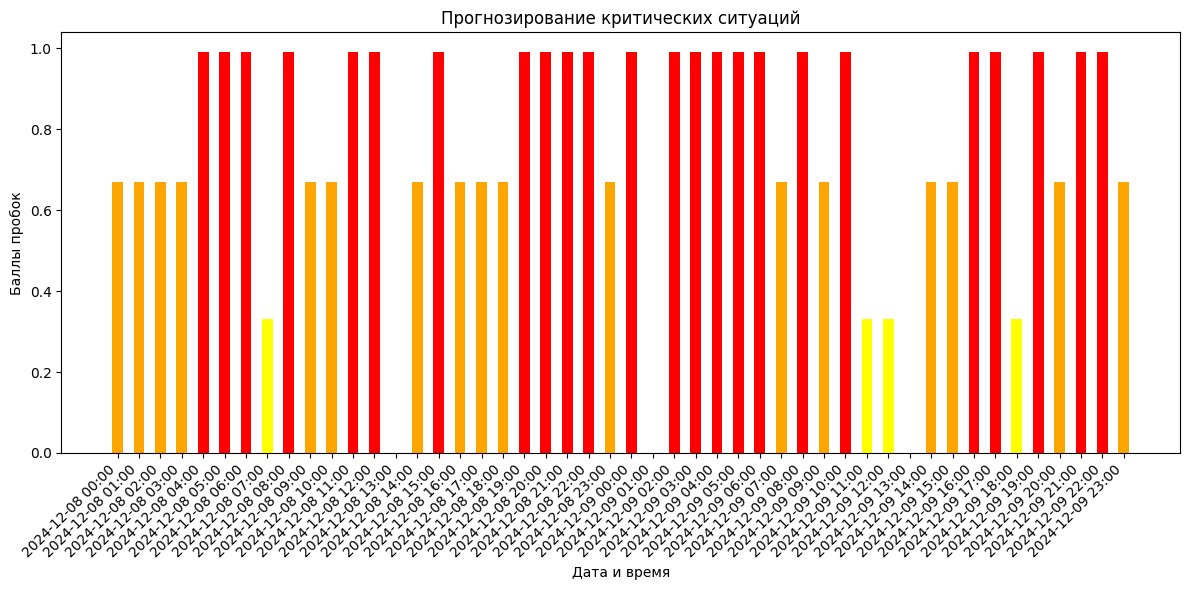

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что predictions - это массив с предсказанными классами
# predictions = model.predict(test_df)

# Создаем DataFrame из предсказаний
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Class'])

# Добавляем столбцы date и time_of_day из test_df
predictions_df['date'] = test_df['date'].values
predictions_df['time_of_day'] = test_df['time_of_day'].values

# Функция для округления предсказаний
def round_predictions(pred):
    if pred >= 0.99:
        return 0.99
    elif pred >= 0.67:
        return 0.67
    elif pred >= 0.33:
        return 0.33
    else:
        return 0

# Применяем функцию округления к столбцу Predicted_Class
predictions_df['Predicted_Class'] = predictions_df['Predicted_Class'].apply(round_predictions)

# Устанавливаем цвета для каждого класса
color_mapping = {
    0: 'green',
    0.33: 'yellow',
    0.67: 'orange',
    0.99: 'red'
}

# Создаем новый столбец color в соответствии с Predicted_Class
predictions_df['color'] = predictions_df['Predicted_Class'].map(color_mapping)

# Проверяем на наличие NaN в столбце color и заменяем их на 'grey' (если есть)
predictions_df['color'].fillna('grey', inplace=True)

# Создаем новый столбец для отображения времени
predictions_df['date_time'] = predictions_df['date'].astype(str) + ' ' + predictions_df['time_of_day'].astype(str)

# Сохраняем DataFrame в CSV файл
predictions_df.to_csv('predictions.csv', index=False)

print("CSV файл с предсказаниями успешно создан!")

# Строим гистограмму
plt.figure(figsize=(12, 6))
plt.bar(predictions_df['date_time'], predictions_df['Predicted_Class'], color=predictions_df['color'], width=0.5)

# Настраиваем график
plt.xlabel('Дата и время')
plt.ylabel('Баллы пробок')
plt.title('Прогнозирование критических ситуаций')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показываем график
plt.show()

In [ ]:
predictions_df.sample(20)

,Predicted_Class,date,time_of_day,color,date_time
39,0.67,2024-12-09,15:00,grey,2024-12-09 15:00
45,0.99,2024-12-09,21:00,grey,2024-12-09 21:00
34,0.99,2024-12-09,10:00,grey,2024-12-09 10:00
21,0.99,2024-12-08,21:00,grey,2024-12-08 21:00
46,0.99,2024-12-09,22:00,grey,2024-12-09 22:00
18,0.67,2024-12-08,18:00,grey,2024-12-08 18:00
1,0.67,2024-12-08,01:00,grey,2024-12-08 01:00
42,0.33,2024-12-09,18:00,grey,2024-12-09 18:00
5,0.99,2024-12-08,05:00,grey,2024-12-08 05:00
37,0.00,2024-12-09,13:00,green,2024-12-09 13:00


from matplotlib import pyplot as plt
_df_0['Predicted_Class'].plot(kind='hist', bins=20, title='Predicted_Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Predicted_Class']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Predicted_Class')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Predicted_Class']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('color')):
  _plot_series(series, series_name, i)
  fig.legend(title='color', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Predicted_Class')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('color')):
  _plot_series(series, series_name, i)
  fig.legend(title='color', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Predicted_Class'].plot(kind='line', figsize=(8, 4), title='Predicted_Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['color'].value_counts()
    for x_label, grp in _df_8.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('color')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Predicted_Class', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['color'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Predicted_Class', y='color', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Сортировка по взвешенной сумме в убывающем порядке
df_ranked_res = df.sort_values('result', ascending=False)
df_ranked_time = df.sort_values('result', ascending=False)
print(df_ranked)

                     events  peoples  result
0      Парк 30-летия Победы     4917    0.99
55258     Стадион Краснодар     7720    0.99
17176     Стадион Краснодар     9399    0.99
55253     Стадион Краснодар     2123    0.99
33636     Стадион Краснодар     2260    0.99
...                     ...      ...     ...
7279              БаскетХол     4976    0.00
54210       Красная площадь     4568    0.00
90407     Стадион Краснодар     9585    0.00
24782       Красная площадь     2965    0.00
73777     Стадион Краснодар     6590    0.00

[100000 rows x 3 columns]
